<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/prior_post_predictive_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot rior and posterior predctiive for beta binomial distribution.
Based on  fig 1.6 of 'Bayesian Modeling and Computation'.
Code currently uses pymc3, although it could be done analytically.

In [1]:
!git clone https://github.com/probml/pyprobml /pyprobml &> /dev/null
%cd -q /pyprobml/scripts
import pyprobml_utils as pml
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#!pip install pymc3 # colab uses 3.7 by default (as of April 2021)

 # arviz needs 3.8+
#!pip install pymc3>=3.8 # fails to update
!pip install pymc3==3.11 

import pymc3 as pm
print(pm.__version__)

#!pip install arviz
import arviz as az
print(az.__version__)

     |████████████████████████████████| 870kB 5.7MB/s 
     |████████████████████████████████| 1.6MB 17.2MB/s 
     |████████████████████████████████| 1.8MB 31.3MB/s 
     |████████████████████████████████| 768kB 40.3MB/s 
     |████████████████████████████████| 4.7MB 41.0MB/s 
     |████████████████████████████████| 317kB 38.9MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.0-cp37-none-any.whl size=1530105 sha256=b5d16cb66a5960db31a0b16c584362b0067e68e9d3fcb0a11df854afd37496d2
  Stored in directory: /root/.cache/pip/wheels/04/f4/99/b28060d0c539d136469541a984e54372a4ce8cd995f9de257f
Successfully built theano-pymc
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
3.11.0
0.11.2


In [4]:


import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize

import pyprobml_utils as pml


np.random.seed(0)
Y = stats.bernoulli(0.7).rvs(20)


with pm.Model() as model:
    θ = pm.Beta("θ", 1, 1)
    y_obs = pm.Binomial("y_obs",n=1, p=θ, observed=Y)
    idata = pm.sample(1000, return_inferencedata=True)
    
    
pred_dists = (pm.sample_prior_predictive(1000, model)["y_obs"],
              pm.sample_posterior_predictive(idata, 1000, model)["y_obs"])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


/usr/local/lib/python3.7/dist-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [9]:
dist=pred_dists[0]
print(dist.shape)
num_success = dist.sum(1)
print(num_success.shape)


(1000, 20)
(1000,)


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0, 'number of success')

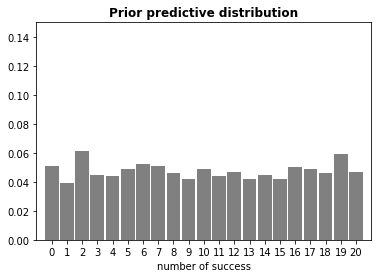

In [16]:

fig, ax = plt.subplots()
az.plot_dist(pred_dists[0].sum(1), hist_kwargs={"color":"0.5", "bins":range(0, 22)})
ax.set_title(f"Prior predictive distribution",fontweight='bold')
ax.set_xlim(-1, 21)
ax.set_ylim(0, 0.15) 
ax.set_xlabel("number of success")

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0, 'number of success')

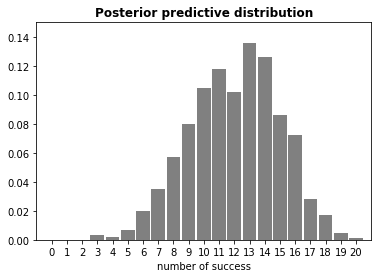

In [17]:
fig, ax = plt.subplots()
az.plot_dist(pred_dists[1].sum(1), hist_kwargs={"color":"0.5", "bins":range(0, 22)})
ax.set_title(f"Posterior predictive distribution",fontweight='bold')
ax.set_xlim(-1, 21)
ax.set_ylim(0, 0.15) 
ax.set_xlabel("number of success")

Text(0.5, 0, 'θ')

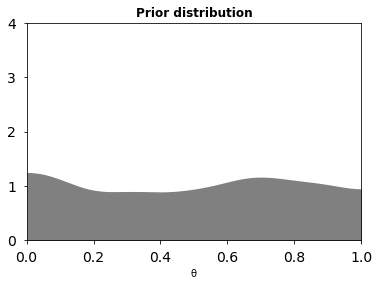

In [20]:
fig, ax = plt.subplots()
az.plot_dist(θ.distribution.random(size=1000), plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1})
ax.set_title("Prior distribution", fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 4)
ax.tick_params(axis='both', pad=7)
ax.set_xlabel("θ") 
    




Text(0.5, 0, 'θ')

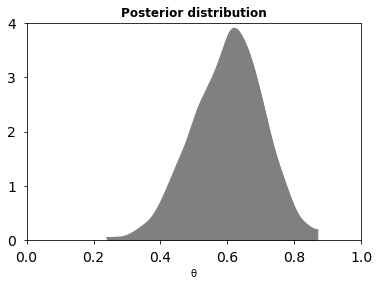

In [21]:
fig, ax = plt.subplots()
az.plot_dist(idata.posterior["θ"], plot_kwargs={"color":"0.5"},
             fill_kwargs={'alpha':1})
ax.set_title("Posterior distribution", fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 4)
ax.tick_params(axis='both', pad=7)
ax.set_xlabel("θ")
